# Normalización de un vector

Dado un arreglo:
$$
v \in R^{n}
$$
Cuyos elementos cumplen:
$$
v_{i} \in [-10,10]
$$
Se le pide normalizar el arreglo considerando que $\mu$ es la media aritmética de los elementos de $v$ y $\sigma$ es la desviación estándar de los elementos de $v$.

Los elementos del arreglo de salida deben tener esa forma:
$$
o_{i} = (v_{i} - \mu) / \sigma
$$
Luego de normalizar todos los elementos del vector se debe cumplir que $\mu_{o}$ es $0$ y $\sigma_{o}$ es $1$.

Consideraciones para su solución:

- Tome en cuenta la precisión, pero sin priorizarla sobre la rapidez.
- Deberá trabajar con arreglos `numpy`.
- Su función en *Python* que normalizará el arreglo de entrada no puede emplear funciones de ningún módulo, ni predefinidas por el entorno.
- Su función en *C* que normalizará el arreglo de entrada solo puede emplear como función auxiliar la función `sqrt` o alguna de sus variantes.

In [1]:
import random

In [2]:
import numpy as np

In [3]:
def crear_arreglo(tam):
  rango_min = -10.0
  rango_max = 10.0
  return np.asarray([random.uniform(rango_min, rango_max) for _ in range(tam)], dtype=np.float32)

a) (0.5 ptos) Usar la función `crear_arreglo` para crear un arreglo de 16 elementos.

In [4]:
size=16
arr= crear_arreglo(size)
print(arr)

[-7.7498879e+00 -4.5165518e-01 -3.9438088e+00  2.6845856e+00
  4.9285913e+00  1.6513762e+00  1.8758178e-01  5.5284953e+00
  7.8082881e+00  5.7296653e+00 -1.7767667e+00  3.5725727e+00
 -2.4936779e+00  2.7593707e-03  5.3470521e+00 -4.0042105e-01]


b) (2.0 ptos) Implementar en *Python* la función `py_normalizar_arreglo`. Debe recibir un arreglo y devolver el arreglo normalizado.

In [5]:
def py_normalizar_arreglo(arr):
    #Hallar la media de los elementos 
    s=0
    size=len(arr)
    for i in range(size):
        s= arr[i] + s
    #Valor de la media
    media= s/size
    #print(f"Media: {media}")
    #Hallamos la desviación estandar
    d=0
    for j in range(size):
        d= ((arr[j] - media)**2)+ d
    desviacion = (d/size)**0.5
    #print(f"Desviación estandar: {desviacion}")

    #Vector resultado
    r =crear_arreglo(size)
    for n in range(size):
        r[n] = (arr[n] - media)/desviacion
        
    return r

c) (0.5 pto) Pruebe la función `py_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [6]:
relativo= py_normalizar_arreglo(arr)
print(relativo)

[-2.2477152  -0.43286103 -1.3012562   0.34702912  0.9050468   0.09010058
 -0.27390173  1.0542252   1.6211421   1.1042502  -0.762377    0.5678452
 -0.9406516  -0.3198616   1.0091057  -0.42012063]


In [7]:
import statistics

In [8]:
ref_media=statistics.mean(relativo)
print(ref_media)

-2.3283064e-09


In [9]:
ref_desv=statistics.stdev(relativo)
print(ref_desv)

1.0327955282089378


d) (3.0 ptos) Implementar la función `normalizar_vector` en *C*.

In [10]:
%%file normalizar_vector.c
#include<math.h>
#include<stdlib.h>
void normalizar_vector(float* arr, float * arr_out){
    //Hallar la media de los elementos 
    float s=0.0;
    int size=sizeof(arr);
    for(int i=0; i < size; i++){
        s = arr[i] + s;
    }
    //Valor de la media
    float media = s/(float)size;
    //Hallamos la desviación estandar
    float d=0.0;
    for(int j=0; j <size; j++){
        d = pow(arr[j] - media,2) + d;
    }
    
    float desviacion = sqrt(d/(float)size);

    //Vector resultado
    for(int n=0; n<size; n++){
        arr_out[n] = (arr[n] - media) / desviacion;
    } 
}

Overwriting normalizar_vector.c


e) (0.5 ptos) Compile su archivo de *C* para generar la *shared library*

In [11]:
! gcc -c normalizar_vector.c -lm

In [12]:
! gcc -shared normalizar_vector.o -o normalizar_vector.so

f) (1.0 pto) Implemente la función `ctypes_normalizar_vector` que devuelva la función implementada en C configurada para usarse.

In [13]:
import ctypes

In [14]:
def ctypes_normalizar_vector():

    lib=ctypes.CDLL('./normalizar_vector.so')

    lib.normalizar_vector.argtypes=[np.ctypeslib.ndpointer(dtype=np.float32), np.ctypeslib.ndpointer(dtype=np.float32)]

    return lib.normalizar_vector



g) (0.5 ptos) Haga una instancia de la función

In [15]:
ctype_c_normalizar_vector = ctypes_normalizar_vector()

h) (1.0 pto) Implementar en *Python* la función `c_normalizar_vector`. Debe recibir un arreglo, y devolver un arreglo normalizado a partir de la instancia de su función *C* ya configurada que hizo en el ítem anterior.

In [16]:
def c_normalizar_vector(arr):
    arr_out=np.zeros(size, dtype=np.float32)
    ctype_c_normalizar_vector(arr, arr_out)
    return arr_out

In [17]:
relativo_c=c_normalizar_vector(arr)
print(relativo_c)

[-1.9398069  -0.19293596 -1.0288016   0.55774     1.0948547   0.31043583
 -0.03993119  1.238445    0.          0.          0.          0.
  0.          0.          0.          0.        ]


i) (0.5 ptos) Pruebe la función `c_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [18]:
ref_desv_c=statistics.stdev(relativo_c)
print(ref_desv_c) #Tiende a ser uno :'v

0.7302967215756822


In [19]:
ref_media_c=statistics.mean(relativo_c)
print(ref_media_c)

-5.355105e-09


In [20]:
from numpy import linalg as LA

In [21]:
def error_relativo(ref, val):
  return LA.norm((ref - val)) / LA.norm(ref)

j) (0.25 ptos) Emplee la función `error_relativo` para calcular el error relativo de su resultado en *C* con respecto a su resultado en *Python*

In [22]:
error_rel_media= error_relativo(ref_media, ref_media_c)
print(error_rel_media)

1.3


In [23]:
error_rel_desv= error_relativo(ref_desv, ref_desv_c)
print(error_rel_desv)

0.2928932188134525


k) (0.25 ptos) Haga un **arreglo** de potencias de 2 que varién desde la potencia 10 hasta la potencia 19.

In [24]:
arr_p= np.arange(10,20,1)
arr_p2=np.zeros(len(arr_p), dtype=int)
t= len(arr_p2)
for j in range(t):  
    arr_p2[j] = 2** arr_p[j]
print(arr_p2)

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]


l) (0.5 ptos) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el menor de los tamaños.

In [25]:
import time

lista_tiempo_c=[]
lista_tiempo_py=[]
size_inp=arr_p2[0]
iter=50
arr_inp= crear_arreglo(size_inp)
for _ in range (iter):
    t1=time.perf_counter()
    c_normalizar_vector(arr_inp)
    t2=time.perf_counter()

    lista_tiempo_c.append(t2-t1)

    t1=time.perf_counter()
    py_normalizar_arreglo(arr_inp)
    t2=time.perf_counter()
    
    lista_tiempo_py.append(t2-t1)
    


m) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

In [26]:
import matplotlib.pyplot as plt

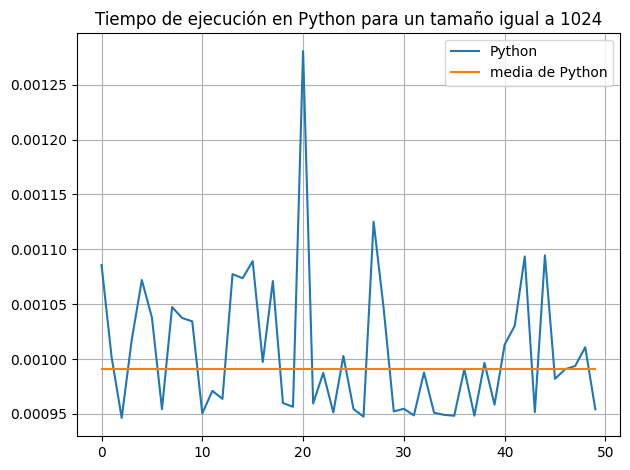

In [27]:
plt.plot(range(iter), lista_tiempo_py, label='Python')
plt.plot(range(iter), [statistics.median(lista_tiempo_py)]*len(lista_tiempo_py), label='media de Python')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en Python para un tamaño igual a {size_inp}')
plt.tight_layout()

n) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

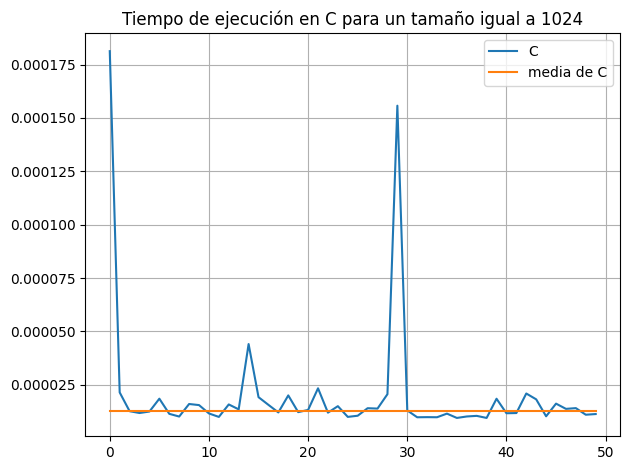

In [28]:
plt.plot(range(iter), lista_tiempo_c, label='C')
plt.plot(range(iter), [statistics.median(lista_tiempo_c)]*len(lista_tiempo_c), label='media de C')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en C para un tamaño igual a {size_inp}')
plt.tight_layout()

o) (0.5 pto) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el mayor de los tamaños.

In [29]:
import time

lista_tiempo_c=[]
lista_tiempo_py=[]
size_inp=arr_p2[9]
iter=50
arr_inp= crear_arreglo(size_inp)
for _ in range (iter):
    t1=time.perf_counter()
    c_normalizar_vector(arr_inp)
    t2=time.perf_counter()

    lista_tiempo_c.append(t2-t1)

    t1=time.perf_counter()
    py_normalizar_arreglo(arr_inp)
    t2=time.perf_counter()
    size_inp
    lista_tiempo_py.append(t2-t1)


p) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

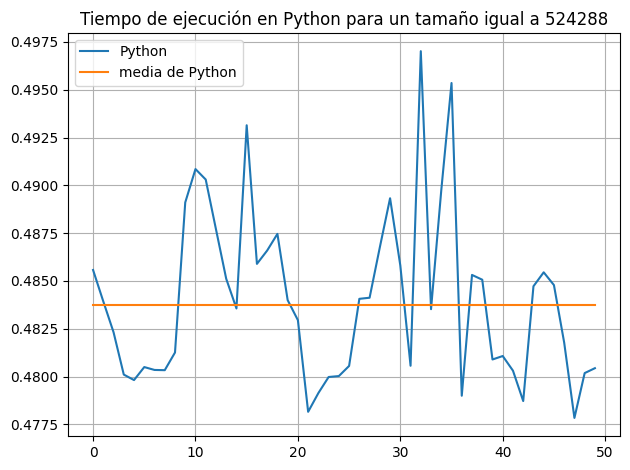

In [30]:
plt.plot(range(iter), lista_tiempo_py, label='Python')
plt.plot(range(iter), [statistics.median(lista_tiempo_py)]*len(lista_tiempo_py), label='media de Python')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en Python para un tamaño igual a {size_inp}')
plt.tight_layout()

q) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

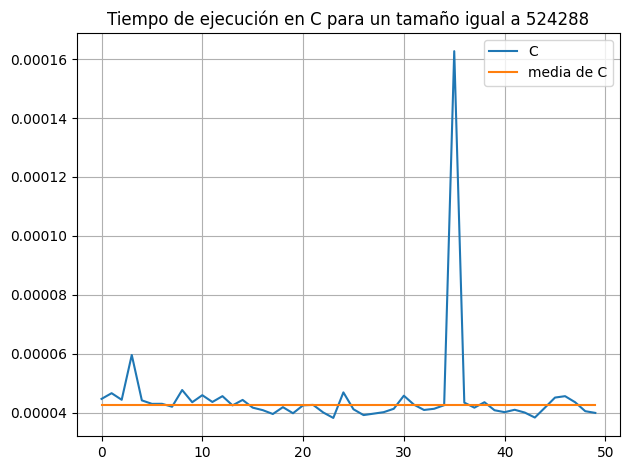

In [31]:
plt.plot(range(iter), lista_tiempo_c, label='C')
plt.plot(range(iter), [statistics.median(lista_tiempo_c)]*len(lista_tiempo_c), label='media de C')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en C para un tamaño igual a {size_inp}')
plt.tight_layout()

r) (0.5 ptos) Realizar 50 mediciones de tiempo y error relativo para las funciones implementadas en *C* y *Python* para todos los tamaños. El elemento representativo de cada tamaño será la mediana de las 50 mediciones.

In [33]:
import time

lista_tiempo_c=[]
lista_tiempo_py=[]
lista_err_rel=[]
iter=50
t_py=[]
t_c=[]

for i in range (len(arr_p2)):
    arr_inp= crear_arreglo(arr_p2[i])
    for _ in range (iter):
        t1=time.perf_counter()
        c_normalizar_vector(arr_inp)
        t2=time.perf_counter()
        lista_tiempo_c.append(t2-t1)

        t1=time.perf_counter()
        py_normalizar_arreglo(arr_inp)
        t2=time.perf_counter()
        lista_tiempo_py.append(t2-t1)
    t_c.append(statistics.median(lista_tiempo_c))
    t_py.append(statistics.median(lista_tiempo_py))





s) (0.5 ptos) Presentar una gráfica de tiempo de ejecución por tamaño a partir de sus mediciones del ítem anterior.

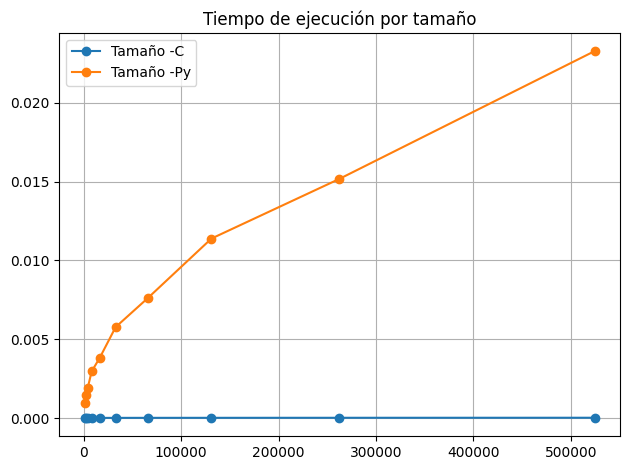

In [36]:
plt.plot(arr_p2, t_c, '-o',label='Tamaño -C')
plt.plot(arr_p2, t_py,'-o', label='Tamaño -Py')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución por tamaño')
plt.tight_layout()

t) (0.5 ptos) Presentar una gráfica de speedup por tamaño a partir de sus mediciones.

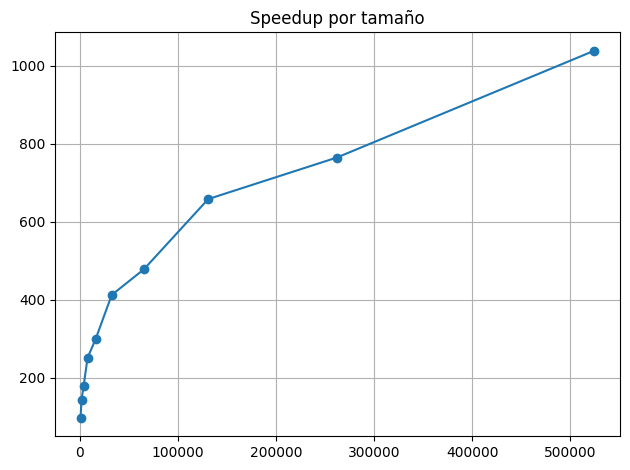

In [37]:

plt.plot(arr_p2, np.asarray(t_py)/np.asarray(t_c), '-o')
plt.grid(True)
plt.title('Speedup por tamaño')
plt.tight_layout()

u) (0.5 ptos) Presentar una gráfica de error relativo por tamaño a partir de sus mediciones